In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import softmax
from matplotlib import rc

In [17]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
sns.set_style('whitegrid')

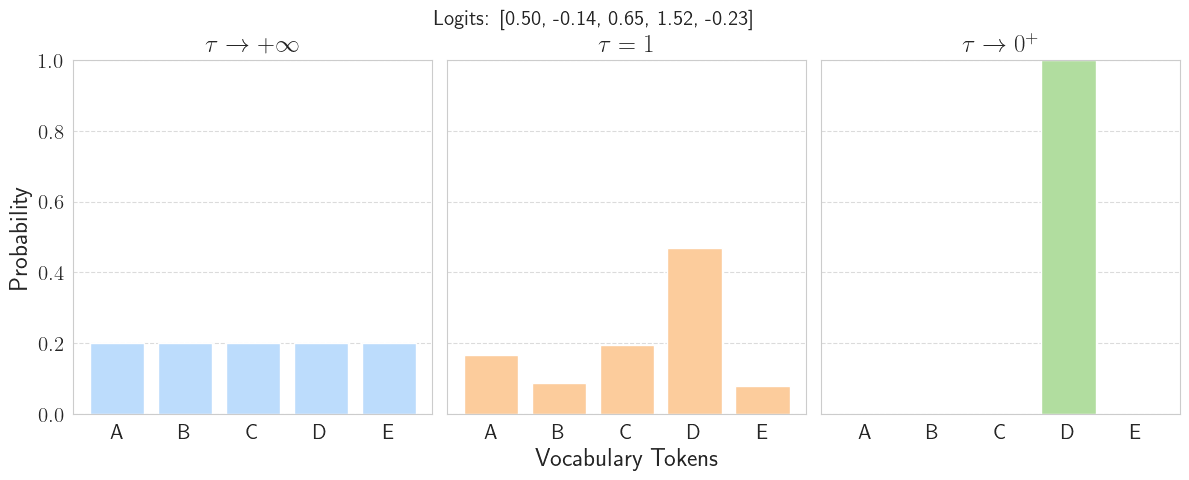

In [19]:
np.random.seed(42)

logits = np.random.randn(5)

fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

categories = ['A', 'B', 'C', 'D', 'E']

colors = {
    'infinity': '#bcdcfc',
    'one': '#fccc9c',
    'zero': '#b1dd9f',
}

for ax in axes:
    ax.grid(False)

uniform_probs = np.ones(5) / 5
axes[0].bar(categories, uniform_probs, color=colors['infinity'])
axes[0].set_title(r'$\tau \rightarrow +\infty$', fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Probability', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].yaxis.grid(True, linestyle='--', alpha=0.7)

temp_1_probs = softmax(logits)
axes[1].bar(categories, temp_1_probs, color=colors['one'])
axes[1].set_title(r'$\tau = 1$', fontsize=18)
axes[1].set_xlabel('Vocabulary Tokens', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].yaxis.grid(True, linestyle='--', alpha=0.7)

temp_0_probs = np.zeros(5)
temp_0_probs[np.argmax(logits)] = 1.0
axes[2].bar(categories, temp_0_probs, color=colors['zero'])
axes[2].set_title(r'$\tau \rightarrow 0^+$', fontsize=18)
axes[2].tick_params(axis='both', which='major', labelsize=15)
axes[2].yaxis.grid(True, linestyle='--', alpha=0.7)

logit_text = f"Logits: [{', '.join([f'{x:.2f}' for x in logits])}]"
fig.text(0.5, 0.92, logit_text, ha='center', fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig(f'softmax-temperature.png', dpi=300, bbox_inches='tight')
plt.savefig(f'softmax-temperature.svg', format='svg', bbox_inches='tight')